# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)

It is recomended also to use **seaborn** library

### Step 1. Import the necessary libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from titanic.csv 

In [2]:
titanic = pd.read_csv("data/titanic.csv")

### Step 3. Assign it to a variable titanic 

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 4. Set PassengerId as the index 

In [4]:
titanic.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Step 5. Create a pairplot to check how variables correlate

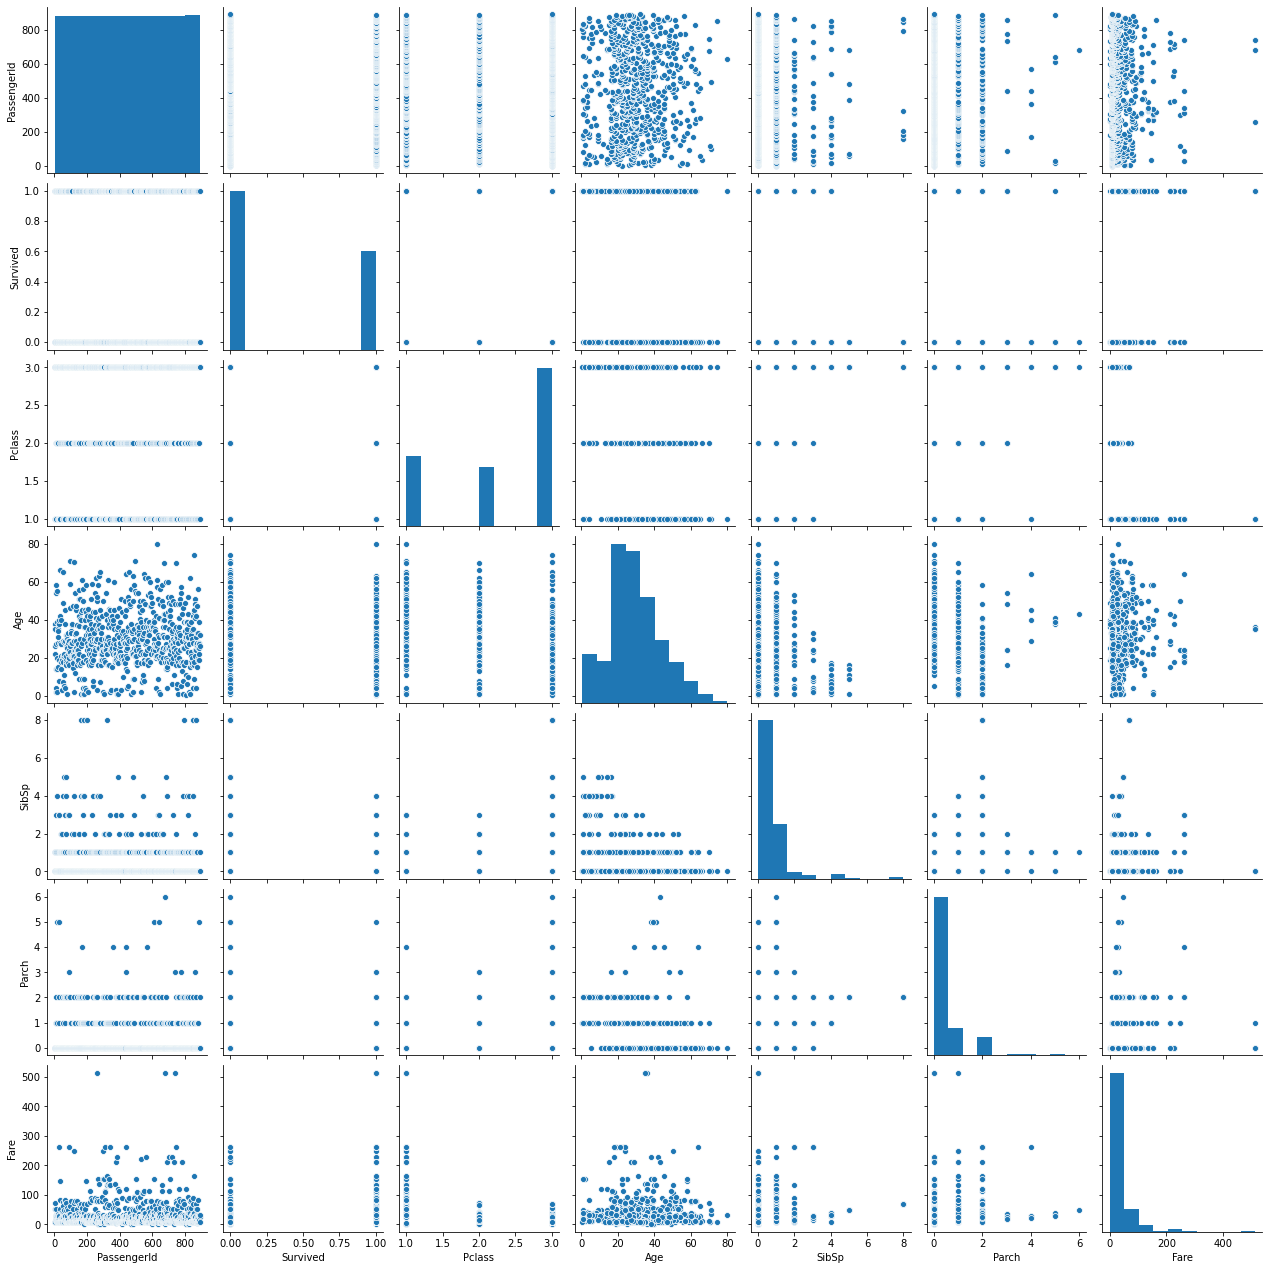

In [5]:
sns.pairplot(titanic)

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

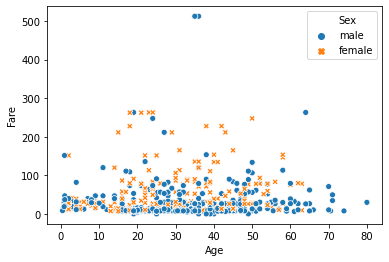

In [6]:
sns.scatterplot(data=titanic[['Age', 'Fare', 'Sex']], x="Age", y="Fare", hue="Sex", style="Sex")

### Step 7. How many people survived?

In [7]:
print("Out of {} passengers, a total of {} survived. \n\n ".format(len(titanic), titanic.Survived.sum()))
print(pd.crosstab(titanic["Sex"], titanic.Survived))

Out of 891 passengers, a total of 342 survived. 

 
Survived    0    1
Sex               
female     81  233
male      468  109


### Step 8. Create a histogram with the Fare payed

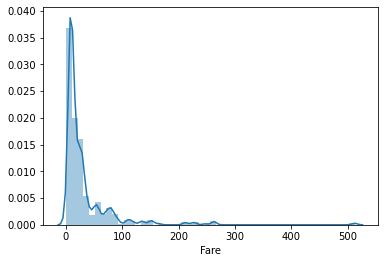

In [8]:
sns.distplot(titanic.Fare)

### Step 9: Create a diagonal correlation plot af all variables ([tip](http://seaborn.pydata.org/examples/many_pairwise_correlations.html))

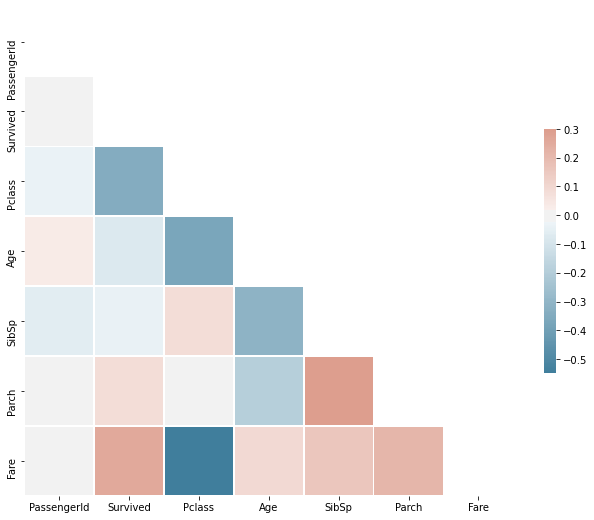

In [9]:
corr = titanic.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})